# Compare the best configurations

In [27]:
# import needed libs

%load_ext autoreload

# Auto reloading causes the kernel to reload the libraries we have
%autoreload 2

# usual imports for visualization, etc.
import numpy as np
import matplotlib.pyplot as plt

import datetime

# make it reproducible
np.random.seed(0)

just_plot = False
# just_plot = True

# show plots inline
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# Some initializations

from envs import SmartVac

max_episode_steps = 100
results_folder = 'res/'
figs_folder = 'figs/'
output_folder = 'output/'

!mkdir output

A subdirectory or file output already exists.


In [29]:
from cycler import cycler
def set_plt_rc():
    font = {'family': 'serif','size': 12}
    
#     SMALL_SIZE = 8
#     MEDIUM_SIZE = 10
#     BIGGER_SIZE = 12

#     plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#     plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#     plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
#     plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#     plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#     plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#     plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#     plt.rc('font', family='serif')
    plt.rc('font', family=font['family'], size=font['size'])
    
    
#     plt.rc('xtick', labelsize='x-small')
#     plt.rc('ytick', labelsize='x-small')
    
    plt.rc('xtick', labelsize='medium')
    plt.rc('ytick', labelsize='medium')
    
    plt.rc('axes', prop_cycle=(cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                                         '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                                         '#bcbd22', '#17becf']) +
                           cycler(linestyle=['-', '--', ':', '-.','-', '--', ':', '-.','-', '--'])))
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    
set_plt_rc()

In [30]:
def run_reinforce_agent(alpha):
    AgentClass = ReinforceAgent
    
    params_str = f'alpha_{alpha}_episodes_{episode_count}'

    agent_name = AgentClass.__name__

    mult_avgs = []
    mult_probs1 = []
    mult_probs2 = []
    for i_test in range(num_of_tests):
        print()
        print(i_test + 1, end=' ')

        # Initialize the agent
        agent = AgentClass(alpha=alpha)

        avgs = []
        probs1 = []
        probs2 = []

        episode_rewards = np.zeros(episode_count)
        for i_episode in range(episode_count):
            done = False
            totalReward = 0

            if i_episode >= plot_count and (i_episode % plot_count == 0):
                avg = np.average(episode_rewards[i_episode - plot_count:i_episode])
                avgs.append(avg)

                # deterministic position
                env.x = 0
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs1.append(prob)

                # stochastic position
                env.x = 1
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs2.append(prob)

                print('#', end='', flush=True)
                if len(avgs) % 100 == 0:
                    print(i_episode)

            obs = env.reset()
            action = agent.start(obs)

            step = 0
            while not done:
                obs, reward, done = env.step(action)
                action = agent.step(obs, reward, done)
                totalReward += reward

                step += 1
                if step > max_episode_steps:
                    done = True

            episode_rewards[i_episode] = totalReward
            agent.update_for_episode()

        mult_avgs.append(avgs)
        mult_probs1.append(probs1)
        mult_probs2.append(probs2)

    mult_avgs = np.array(mult_avgs)
    avgs = np.mean(mult_avgs, axis=0)
    
    results_tmp = f'\n\nAgent: {agent_name} \tAlpha: {alpha}'
    results_tmp += f'\nAverage: \t\t{np.mean(avgs):5.3f}'
    results_tmp += f'\nBest {plot_count} Average: \t{np.max(avgs):5.3f}'
    results_tmp += f'\nLast {plot_count} Average: \t{avgs[-1]:5.3f}'
    print(results_tmp)
    
    return mult_avgs

def run_reinforce_with_baseline_agent(alpha_theta=0.1, alpha_w=0.01):
    AgentClass = ReinforceWithBaselineAgent
    
    params_str = f'alpha_theta_{alpha_theta}_alpha_w_{alpha_w}_episodes_{episode_count}'

    agent_name = AgentClass.__name__

    mult_avgs = []
    mult_probs1 = []
    mult_probs2 = []
    for i_test in range(num_of_tests):
        print()
        print(i_test + 1, end=' ')

        # Initialize the agent
        agent = AgentClass(alpha_w=alpha_w, alpha_theta=alpha_theta)

        avgs = []
        probs1 = []
        probs2 = []

        episode_rewards = np.zeros(episode_count)
        for i_episode in range(episode_count):
            done = False
            totalReward = 0

            if i_episode >= plot_count and (i_episode % plot_count == 0):
                avg = np.average(episode_rewards[i_episode - plot_count:i_episode])
                avgs.append(avg)

                # deterministic position
                env.x = 0
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs1.append(prob)

                # stochastic position
                env.x = 1
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs2.append(prob)

                print('#', end='', flush=True)
                if len(avgs) % 100 == 0:
                    print(i_episode)

            obs = env.reset()
            action = agent.start(obs)

            step = 0
            while not done:
                obs, reward, done = env.step(action)
                action = agent.step(obs, reward, done)
                totalReward += reward

                step += 1
                if step > max_episode_steps:
                    done = True

            episode_rewards[i_episode] = totalReward
            agent.update_for_episode()

        mult_avgs.append(avgs)
        mult_probs1.append(probs1)
        mult_probs2.append(probs2)

    mult_avgs = np.array(mult_avgs)
    avgs = np.mean(mult_avgs, axis=0)
    
    results_tmp = f'\n\nAgent: {agent_name} \tAlpha_w: {alpha_w}\tAlpha_theta: {alpha_theta}'
    results_tmp += f'\nAverage: \t\t{np.mean(avgs):5.3f}'
    results_tmp += f'\nBest {plot_count} Average: \t{np.max(avgs):5.3f}'
    results_tmp += f'\nLast {plot_count} Average: \t{avgs[-1]:5.3f}'
    print(results_tmp)
    
    return mult_avgs

def run_actor_critic_agent(alpha_theta=0.1, alpha_w=0.01):
    AgentClass = ActorCriticAgent

    params_str = f'alpha_theta_{alpha_theta}_alpha_w_{alpha_w}_episodes_{episode_count}'

    agent_name = AgentClass.__name__

    mult_avgs = []
    mult_probs1 = []
    mult_probs2 = []
    for i_test in range(num_of_tests):
        print()
        print(i_test + 1, end=' ')

        # Initialize the agent
        agent = AgentClass(alpha_w=alpha_w, alpha_theta=alpha_theta)

        avgs = []
        probs1 = []
        probs2 = []

        episode_rewards = np.zeros(episode_count)
        for i_episode in range(episode_count):
            done = False
            totalReward = 0

            if i_episode >= plot_count and (i_episode % plot_count == 0):
                avg = np.average(episode_rewards[i_episode - plot_count:i_episode])
                avgs.append(avg)

                # deterministic position
                env.x = 0
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs1.append(prob)

                # stochastic position
                env.x = 1
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs2.append(prob)

                print('#', end='', flush=True)
                if len(avgs) % 100 == 0:
                    print(i_episode)

            obs = env.reset()
            action = agent.start(obs)

            step = 0
            while not done:
                obs, reward, done = env.step(action)
                action = agent.step(obs, reward, done)
                totalReward += reward

                step += 1
                if step > max_episode_steps:
                    done = True

            episode_rewards[i_episode] = totalReward
            agent.update_for_episode()

        mult_avgs.append(avgs)
        mult_probs1.append(probs1)
        mult_probs2.append(probs2)

    mult_avgs = np.array(mult_avgs)
    avgs = np.mean(mult_avgs, axis=0)
    
    results_tmp = f'\n\nAgent: {agent_name} \tAlpha_w: {alpha_w}\tAlpha_theta: {alpha_theta}'
    results_tmp += f'\nAverage: \t\t{np.mean(avgs):5.3f}'
    results_tmp += f'\nBest {plot_count} Average: \t{np.max(avgs):5.3f}'
    results_tmp += f'\nLast {plot_count} Average: \t{avgs[-1]:5.3f}'
    print(results_tmp)
    
    return mult_avgs
    
def plot_agent(mult_avgs, agent_name):
    avgs = np.mean(np.array(mult_avgs), axis=0)
    idx = range(len(avgs))
    
    plt.figure(1, figsize=(7,4))
    plt.plot(np.array(idx)*100, avgs, label=agent_name)
#     plt.title(f'Average Return in {episode_count} episodes')
    plt.xlabel(f'Time')
#     plt.ylabel(f'Average Return per {plot_count} episodes')
    plt.ylabel(f'Average Return\non {episode_count} episodes')
    plt.axhline(y=best_performance, linewidth=1, color="g", linestyle='--')

In [31]:
from agents import ReinforceAgent, ReinforceWithBaselineAgent, ActorCriticAgent

best_performance = 0.63
env = SmartVac()
num_of_tests = 500
episode_count = 10000
plot_count = int(episode_count / 100)

if not just_plot:
    avgs1 = run_reinforce_agent(alpha=0.125)
    avgs2 = run_reinforce_with_baseline_agent(alpha_w=0.5, alpha_theta=0.25)
    avgs3 = run_actor_critic_agent(alpha_w=0.125, alpha_theta=0.5)


1 ###################################################################################################
2 ###################################################################################################
3 ###################################################################################################
4 ###################################################################################################
5 ###################################################################################################
6 ###################################################################################################
7 ###################################################################################################
8 ###################################################################################################
9 ###################################################################################################
10 ##############################################################################

80 ###################################################################################################
81 ###################################################################################################
82 ###################################################################################################
83 ###################################################################################################
84 ###################################################################################################
85 ###################################################################################################
86 ###################################################################################################
87 ###################################################################################################
88 ###################################################################################################
89 ######################################################################

158 ###################################################################################################
159 ###################################################################################################
160 ###################################################################################################
161 ###################################################################################################
162 ###################################################################################################
163 ###################################################################################################
164 ###################################################################################################
165 ###################################################################################################
166 ###################################################################################################
167 ############################################################

236 ###################################################################################################
237 ###################################################################################################
238 ###################################################################################################
239 ###################################################################################################
240 ###################################################################################################
241 ###################################################################################################
242 ###################################################################################################
243 ###################################################################################################
244 ###################################################################################################
245 ############################################################

314 ###################################################################################################
315 ###################################################################################################
316 ###################################################################################################
317 ###################################################################################################
318 ###################################################################################################
319 ###################################################################################################
320 ###################################################################################################
321 ###################################################################################################
322 ###################################################################################################
323 ############################################################

392 ###################################################################################################
393 ###################################################################################################
394 ###################################################################################################
395 ###################################################################################################
396 ###################################################################################################
397 ###################################################################################################
398 ###################################################################################################
399 ###################################################################################################
400 ###################################################################################################
401 ############################################################

470 ###################################################################################################
471 ###################################################################################################
472 ###################################################################################################
473 ###################################################################################################
474 ###################################################################################################
475 ###################################################################################################
476 ###################################################################################################
477 ###################################################################################################
478 ###################################################################################################
479 ############################################################

48 ###################################################################################################
49 ###################################################################################################
50 ###################################################################################################
51 ###################################################################################################
52 ###################################################################################################
53 ###################################################################################################
54 ###################################################################################################
55 ###################################################################################################
56 ###################################################################################################
57 ######################################################################

127 ###################################################################################################
128 ###################################################################################################
129 ###################################################################################################
130 ###################################################################################################
131 ###################################################################################################
132 ###################################################################################################
133 ###################################################################################################
134 ###################################################################################################
135 ###################################################################################################
136 ############################################################

205 ###################################################################################################
206 ###################################################################################################
207 ###################################################################################################
208 ###################################################################################################
209 ###################################################################################################
210 ###################################################################################################
211 ###################################################################################################
212 ###################################################################################################
213 ###################################################################################################
214 ############################################################

283 ###################################################################################################
284 ###################################################################################################
285 ###################################################################################################
286 ###################################################################################################
287 ###################################################################################################
288 ###################################################################################################
289 ###################################################################################################
290 ###################################################################################################
291 ###################################################################################################
292 ############################################################

361 ###################################################################################################
362 ###################################################################################################
363 ###################################################################################################
364 ###################################################################################################
365 ###################################################################################################
366 ###################################################################################################
367 ###################################################################################################
368 ###################################################################################################
369 ###################################################################################################
370 ############################################################

439 ###################################################################################################
440 ###################################################################################################
441 ###################################################################################################
442 ###################################################################################################
443 ###################################################################################################
444 ###################################################################################################
445 ###################################################################################################
446 ###################################################################################################
447 ###################################################################################################
448 ############################################################

16 ###################################################################################################
17 ###################################################################################################
18 ###################################################################################################
19 ###################################################################################################
20 ###################################################################################################
21 ###################################################################################################
22 ###################################################################################################
23 ###################################################################################################
24 ###################################################################################################
25 ######################################################################

95 ###################################################################################################
96 ###################################################################################################
97 ###################################################################################################
98 ###################################################################################################
99 ###################################################################################################
100 ###################################################################################################
101 ###################################################################################################
102 ###################################################################################################
103 ###################################################################################################
104 #################################################################

173 ###################################################################################################
174 ###################################################################################################
175 ###################################################################################################
176 ###################################################################################################
177 ###################################################################################################
178 ###################################################################################################
179 ###################################################################################################
180 ###################################################################################################
181 ###################################################################################################
182 ############################################################

251 ###################################################################################################
252 ###################################################################################################
253 ###################################################################################################
254 ###################################################################################################
255 ###################################################################################################
256 ###################################################################################################
257 ###################################################################################################
258 ###################################################################################################
259 ###################################################################################################
260 ############################################################

329 ###################################################################################################
330 ###################################################################################################
331 ###################################################################################################
332 ###################################################################################################
333 ###################################################################################################
334 ###################################################################################################
335 ###################################################################################################
336 ###################################################################################################
337 ###################################################################################################
338 ############################################################

407 ###################################################################################################
408 ###################################################################################################
409 ###################################################################################################
410 ###################################################################################################
411 ###################################################################################################
412 ###################################################################################################
413 ###################################################################################################
414 ###################################################################################################
415 ###################################################################################################
416 ############################################################

485 ###################################################################################################
486 ###################################################################################################
487 ###################################################################################################
488 ###################################################################################################
489 ###################################################################################################
490 ###################################################################################################
491 ###################################################################################################
492 ###################################################################################################
493 ###################################################################################################
494 ############################################################

In [32]:
# Save Results
import pickle

pkl_file_name = f'{output_folder}smart-vac-comp.pkl'
print(pkl_file_name)

if not just_plot:
    res_vars = {
        'avgs1': avgs1,
        'avgs2': avgs2,
        'avgs3': avgs3,
    }

    with open(pkl_file_name, "wb") as f:
        pickle.dump(res_vars, f)

output/smart-vac-comp.pkl


In [33]:
# Load Results
import pickle

if just_plot:
    res_vars = {}
    with open(pkl_file_name, "rb") as f:
        res_vars = pickle.load(f)

    for var in res_vars:
        vars()[var] = res_vars[var]

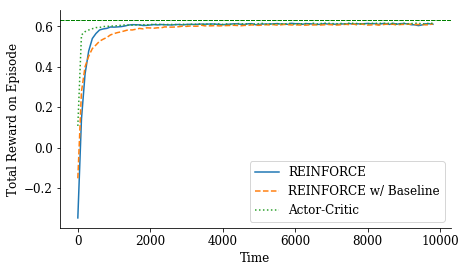

In [34]:
plot_agent(avgs1, 'REINFORCE')
plot_agent(avgs2, 'REINFORCE w/ Baseline')
plot_agent(avgs3, 'Actor-Critic')
plt.legend()
plt.savefig(f'{figs_folder}smart-vac-comp.pdf')
# plt.savefig(f'{figs_folder}smart-vac-comp.png')
plt.show()

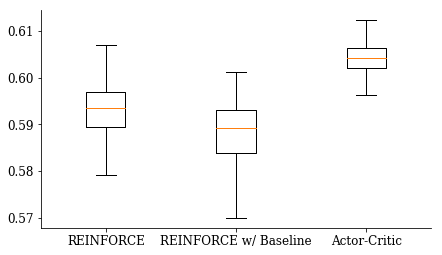

In [35]:
plt.figure(1, figsize=(7,4))
d2 = [np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]]
plt.boxplot(d2, showfliers=False)
ax = plt.gca()
ax.set_xticklabels(['REINFORCE', 'REINFORCE w/ Baseline', 'Actor-Critic'])
plt.ylabel(f'Average Return\non {episode_count} episodes')
plt.savefig(f'{figs_folder}smart-vac-comp-box.pdf')
# plt.savefig(f'{figs_folder}smart-vac-comp-box.png')
plt.show()

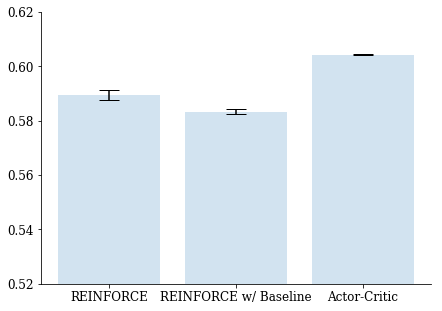

In [36]:
plt.figure(1, figsize=(7,5))
se = np.std([np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]], axis=1) / np.sqrt(num_of_tests)
agents = ['REINFORCE', 'REINFORCE w/ Baseline', 'Actor-Critic']
y = [np.mean(x) for x in [avgs1,avgs2,avgs3]]

plt.bar(range(len(agents)), [np.mean(x) for x in [avgs1,avgs2,avgs3]], alpha=0.2, ecolor='black', capsize=10, yerr=se)
# plt.errorbar(range(len(agents)), y, se, linestyle='None', color='r')
plt.xticks(range(len(agents)), agents)
# plt.ylim(bottom=best_performance-0.13)
plt.ylim(bottom=0.52, top=0.62)
plt.ylabel(f'Average Return\non {episode_count} episodes')
plt.savefig(f'{figs_folder}smart-vac-comp-se.pdf')
# plt.savefig(f'{figs_folder}smart-vac-comp-se.png')
plt.show()

In [37]:
# plt.figure(1, figsize=(7,10))

# plt.subplot(211)
# d2 = [np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]]
# plt.boxplot(d2, showfliers=False)
# ax = plt.gca()
# ax.set_xticklabels(['REINFORCE', 'REINFORCE w/ Baseline', 'Actor-Critic'])

# ax = plt.subplot(212)
# se = np.std([np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]], axis=1) / np.sqrt(num_of_tests)
# agents = ['REINFORCE', 'REINFORCE w/ Baseline', 'Actor-Critic']
# y = [np.mean(x) for x in [avgs1,avgs2,avgs3]]
# plt.bar(range(len(agents)), [np.mean(x) for x in [avgs1,avgs2,avgs3]], alpha=0.5, ecolor='black', capsize=10, yerr=se)
# plt.xticks(range(len(agents)), agents)
# plt.ylim(bottom=0.4)

# # plt.savefig(f'{figs_folder}smart-vac-comp-se-box.pdf')
# # plt.savefig(f'{figs_folder}smart-vac-comp-se-box.png')
# plt.show()

In [38]:
print(np.std([np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]], axis=1) / np.sqrt(num_of_tests))
print([np.mean(x) for x in [avgs1,avgs2,avgs3]])

[0.00184161 0.0009854  0.00013895]
[0.5895528282828283, 0.5833502828282829, 0.6042486464646464]


# Compare Best Configuration for negative rewards

In [39]:
from agents import ReinforceAgent, ReinforceWithBaselineAgent, ActorCriticAgent

best_performance = -1.37
env = SmartVac(terminal_rewards=(-1,-3))
num_of_tests = 500
episode_count = 10000
plot_count = int(episode_count / 100)

if not just_plot:
    # REINFORCE doesn't work in this settings
    # avgs1 = run_reinforce_agent(alpha=0.5)
    avgs2 = run_reinforce_with_baseline_agent(alpha_theta=0.25, alpha_w=0.5)
    avgs3 = run_actor_critic_agent(alpha_theta=0.5, alpha_w=0.5)


1 ###################################################################################################
2 ###################################################################################################
3 ###################################################################################################
4 ###################################################################################################
5 ###################################################################################################
6 ###################################################################################################
7 ###################################################################################################
8 ###################################################################################################
9 ###################################################################################################
10 ##############################################################################

80 ###################################################################################################
81 ###################################################################################################
82 ###################################################################################################
83 ###################################################################################################
84 ###################################################################################################
85 ###################################################################################################
86 ###################################################################################################
87 ###################################################################################################
88 ###################################################################################################
89 ######################################################################

158 ###################################################################################################
159 ###################################################################################################
160 ###################################################################################################
161 ###################################################################################################
162 ###################################################################################################
163 ###################################################################################################
164 ###################################################################################################
165 ###################################################################################################
166 ###################################################################################################
167 ############################################################

236 ###################################################################################################
237 ###################################################################################################
238 ###################################################################################################
239 ###################################################################################################
240 ###################################################################################################
241 ###################################################################################################
242 ###################################################################################################
243 ###################################################################################################
244 ###################################################################################################
245 ############################################################

314 ###################################################################################################
315 ###################################################################################################
316 ###################################################################################################
317 ###################################################################################################
318 ###################################################################################################
319 ###################################################################################################
320 ###################################################################################################
321 ###################################################################################################
322 ###################################################################################################
323 ############################################################

392 ###################################################################################################
393 ###################################################################################################
394 ###################################################################################################
395 ###################################################################################################
396 ###################################################################################################
397 ###################################################################################################
398 ###################################################################################################
399 ###################################################################################################
400 ###################################################################################################
401 ############################################################

470 ###################################################################################################
471 ###################################################################################################
472 ###################################################################################################
473 ###################################################################################################
474 ###################################################################################################
475 ###################################################################################################
476 ###################################################################################################
477 ###################################################################################################
478 ###################################################################################################
479 ############################################################

47 ###################################################################################################
48 ###################################################################################################
49 ###################################################################################################
50 ###################################################################################################
51 ###################################################################################################
52 ###################################################################################################
53 ###################################################################################################
54 ###################################################################################################
55 ###################################################################################################
56 ######################################################################

126 ###################################################################################################
127 ###################################################################################################
128 ###################################################################################################
129 ###################################################################################################
130 ###################################################################################################
131 ###################################################################################################
132 ###################################################################################################
133 ###################################################################################################
134 ###################################################################################################
135 ############################################################

204 ###################################################################################################
205 ###################################################################################################
206 ###################################################################################################
207 ###################################################################################################
208 ###################################################################################################
209 ###################################################################################################
210 ###################################################################################################
211 ###################################################################################################
212 ###################################################################################################
213 ############################################################

282 ###################################################################################################
283 ###################################################################################################
284 ###################################################################################################
285 ###################################################################################################
286 ###################################################################################################
287 ###################################################################################################
288 ###################################################################################################
289 ###################################################################################################
290 ###################################################################################################
291 ############################################################

360 ###################################################################################################
361 ###################################################################################################
362 ###################################################################################################
363 ###################################################################################################
364 ###################################################################################################
365 ###################################################################################################
366 ###################################################################################################
367 ###################################################################################################
368 ###################################################################################################
369 ############################################################

438 ###################################################################################################
439 ###################################################################################################
440 ###################################################################################################
441 ###################################################################################################
442 ###################################################################################################
443 ###################################################################################################
444 ###################################################################################################
445 ###################################################################################################
446 ###################################################################################################
447 ############################################################

In [40]:
# Save Results
import pickle

pkl_file_name = f'{output_folder}smart-vac-neg-comp.pkl'
print(pkl_file_name)

if not just_plot:
    res_vars = {
        'avgs1': avgs1,
        'avgs2': avgs2,
        'avgs3': avgs3,
    }

    with open(pkl_file_name, "wb") as f:
        pickle.dump(res_vars, f)

output/smart-vac-neg-comp.pkl


In [41]:
# Load Results
import pickle

if just_plot:
    res_vars = {}
    with open(pkl_file_name, "rb") as f:
        res_vars = pickle.load(f)

    for var in res_vars:
        vars()[var] = res_vars[var]

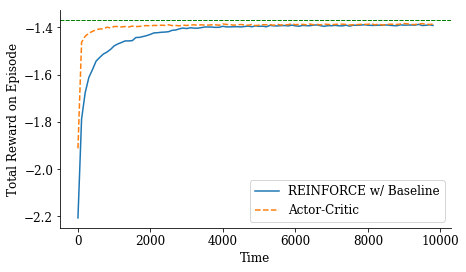

In [42]:
# REINFORCE doesn't work in this settings
# plot_agent(avgs1, 'REINFORCE')
plot_agent(avgs2, 'REINFORCE w/ Baseline')
plot_agent(avgs3, 'Actor-Critic')
plt.legend()
plt.savefig(f'{figs_folder}smart-vac-neg-comp.pdf')
# plt.savefig(f'{figs_folder}smart-vac-neg-comp.png')
plt.show()

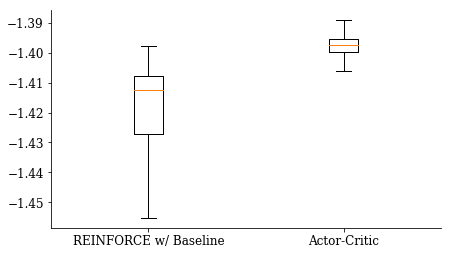

In [43]:
plt.figure(1, figsize=(7,4))
# d2 = [np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]]
d2 = [np.mean(x, axis=1) for x in [avgs2, avgs3]]
plt.boxplot(d2, showfliers=False)
ax = plt.gca()
# ax.set_xticklabels(['REINFORCE', 'REINFORCE w/ Baseline', 'Actor-Critic'])
ax.set_xticklabels(['REINFORCE w/ Baseline', 'Actor-Critic'])
plt.ylabel(f'Average Return\non {episode_count} episodes')
plt.savefig(f'{figs_folder}smart-vac-neg-comp-box.pdf')
# plt.savefig(f'{figs_folder}smart-vac-neg-comp-box.png')
plt.show()

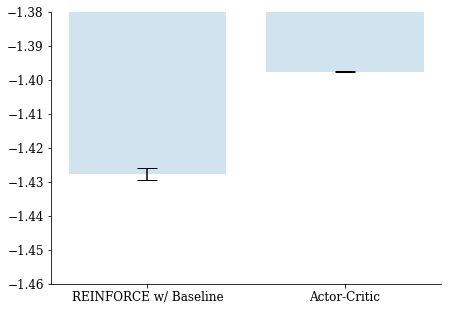

In [44]:
plt.figure(1, figsize=(7,5))
# se = np.std([np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]], axis=1) / np.sqrt(num_of_tests)
se = np.std([np.mean(x, axis=1) for x in [avgs2, avgs3]], axis=1) / np.sqrt(num_of_tests)
# agents = ['REINFORCE', 'REINFORCE w/ Baseline', 'Actor-Critic']
agents = ['REINFORCE w/ Baseline', 'Actor-Critic']
y = [np.mean(x) for x in [avgs1,avgs2,avgs3]]

# plt.bar(range(len(agents)), [np.mean(x) for x in [avgs1,avgs2,avgs3]], alpha=0.5, ecolor='black', capsize=10, yerr=se)
plt.bar(range(len(agents)), [np.mean(x) for x in [avgs2,avgs3]], alpha=0.2, ecolor='black', capsize=10, yerr=se)
plt.xticks(range(len(agents)), agents)
plt.ylim(top=-1.38, bottom=-1.46)
plt.ylabel(f'Average Return\non {episode_count} episodes')
plt.savefig(f'{figs_folder}smart-vac-neg-comp-se.pdf')
# plt.savefig(f'{figs_folder}smart-vac-neg-comp-se.png')
plt.show()

In [45]:
print(np.std([np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]], axis=1) / np.sqrt(num_of_tests))
print([np.mean(x) for x in [avgs1,avgs2,avgs3]])

[0.00184161 0.0017191  0.0001483 ]
[0.5895528282828283, -1.4277736363636364, -1.3975219797979799]


# Compare Best Configuration with memory and negative rewards

In [46]:
from agents import ReinforceMemoryAgent as ReinforceAgent
from agents import ReinforceWithBaselineMemoryAgent as ReinforceWithBaselineAgent
from agents import ActorCriticMemoryAgent as ActorCriticAgent

best_performance = 0.74 - 2
# env = SmartVac()
env = SmartVac(terminal_rewards=(-1,-3))
num_of_tests = 1000
episode_count = 10000
plot_count = int(episode_count / 100)

if not just_plot:
    avgs1 = run_reinforce_agent(alpha=2.0)
    avgs2 = run_reinforce_with_baseline_agent(alpha_w=0.125, alpha_theta=0.5)
    avgs3 = run_actor_critic_agent(alpha_w=0.5, alpha_theta=2.0)


1 ###################################################################################################
2 ###################################################################################################
3 ###################################################################################################
4 ###################################################################################################
5 ###################################################################################################
6 ###################################################################################################
7 ###################################################################################################
8 ###################################################################################################
9 ###################################################################################################
10 ##############################################################################

80 ###################################################################################################
81 ###################################################################################################
82 ###################################################################################################
83 ###################################################################################################
84 ###################################################################################################
85 ###################################################################################################
86 ###################################################################################################
87 ###################################################################################################
88 ###################################################################################################
89 ######################################################################

158 ###################################################################################################
159 ###################################################################################################
160 ###################################################################################################
161 ###################################################################################################
162 ###################################################################################################
163 ###################################################################################################
164 ###################################################################################################
165 ###################################################################################################
166 ###################################################################################################
167 ############################################################

236 ###################################################################################################
237 ###################################################################################################
238 ###################################################################################################
239 ###################################################################################################
240 ###################################################################################################
241 ###################################################################################################
242 ###################################################################################################
243 ###################################################################################################
244 ###################################################################################################
245 ############################################################

314 ###################################################################################################
315 ###################################################################################################
316 ###################################################################################################
317 ###################################################################################################
318 ###################################################################################################
319 ###################################################################################################
320 ###################################################################################################
321 ###################################################################################################
322 ###################################################################################################
323 ############################################################

392 ###################################################################################################
393 ###################################################################################################
394 ###################################################################################################
395 ###################################################################################################
396 ###################################################################################################
397 ###################################################################################################
398 ###################################################################################################
399 ###################################################################################################
400 ###################################################################################################
401 ############################################################

470 ###################################################################################################
471 ###################################################################################################
472 ###################################################################################################
473 ###################################################################################################
474 ###################################################################################################
475 ###################################################################################################
476 ###################################################################################################
477 ###################################################################################################
478 ###################################################################################################
479 ############################################################

548 ###################################################################################################
549 ###################################################################################################
550 ###################################################################################################
551 ###################################################################################################
552 ###################################################################################################
553 ###################################################################################################
554 ###################################################################################################
555 ###################################################################################################
556 ###################################################################################################
557 ############################################################

626 ###################################################################################################
627 ###################################################################################################
628 ###################################################################################################
629 ###################################################################################################
630 ###################################################################################################
631 ###################################################################################################
632 ###################################################################################################
633 ###################################################################################################
634 ###################################################################################################
635 ############################################################

704 ###################################################################################################
705 ###################################################################################################
706 ###################################################################################################
707 ###################################################################################################
708 ###################################################################################################
709 ###################################################################################################
710 ###################################################################################################
711 ###################################################################################################
712 ###################################################################################################
713 ############################################################

782 ###################################################################################################
783 ###################################################################################################
784 ###################################################################################################
785 ###################################################################################################
786 ###################################################################################################
787 ###################################################################################################
788 ###################################################################################################
789 ###################################################################################################
790 ###################################################################################################
791 ############################################################

860 ###################################################################################################
861 ###################################################################################################
862 ###################################################################################################
863 ###################################################################################################
864 ###################################################################################################
865 ###################################################################################################
866 ###################################################################################################
867 ###################################################################################################
868 ###################################################################################################
869 ############################################################

938 ###################################################################################################
939 ###################################################################################################
940 ###################################################################################################
941 ###################################################################################################
942 ###################################################################################################
943 ###################################################################################################
944 ###################################################################################################
945 ###################################################################################################
946 ###################################################################################################
947 ############################################################

15 ###################################################################################################
16 ###################################################################################################
17 ###################################################################################################
18 ###################################################################################################
19 ###################################################################################################
20 ###################################################################################################
21 ###################################################################################################
22 ###################################################################################################
23 ###################################################################################################
24 ######################################################################

94 ###################################################################################################
95 ###################################################################################################
96 ###################################################################################################
97 ###################################################################################################
98 ###################################################################################################
99 ###################################################################################################
100 ###################################################################################################
101 ###################################################################################################
102 ###################################################################################################
103 ##################################################################

172 ###################################################################################################
173 ###################################################################################################
174 ###################################################################################################
175 ###################################################################################################
176 ###################################################################################################
177 ###################################################################################################
178 ###################################################################################################
179 ###################################################################################################
180 ###################################################################################################
181 ############################################################

250 ###################################################################################################
251 ###################################################################################################
252 ###################################################################################################
253 ###################################################################################################
254 ###################################################################################################
255 ###################################################################################################
256 ###################################################################################################
257 ###################################################################################################
258 ###################################################################################################
259 ############################################################

328 ###################################################################################################
329 ###################################################################################################
330 ###################################################################################################
331 ###################################################################################################
332 ###################################################################################################
333 ###################################################################################################
334 ###################################################################################################
335 ###################################################################################################
336 ###################################################################################################
337 ############################################################

406 ###################################################################################################
407 ###################################################################################################
408 ###################################################################################################
409 ###################################################################################################
410 ###################################################################################################
411 ###################################################################################################
412 ###################################################################################################
413 ###################################################################################################
414 ###################################################################################################
415 ############################################################

484 ###################################################################################################
485 ###################################################################################################
486 ###################################################################################################
487 ###################################################################################################
488 ###################################################################################################
489 ###################################################################################################
490 ###################################################################################################
491 ###################################################################################################
492 ###################################################################################################
493 ############################################################

562 ###################################################################################################
563 ###################################################################################################
564 ###################################################################################################
565 ###################################################################################################
566 ###################################################################################################
567 ###################################################################################################
568 ###################################################################################################
569 ###################################################################################################
570 ###################################################################################################
571 ############################################################

640 ###################################################################################################
641 ###################################################################################################
642 ###################################################################################################
643 ###################################################################################################
644 ###################################################################################################
645 ###################################################################################################
646 ###################################################################################################
647 ###################################################################################################
648 ###################################################################################################
649 ############################################################

718 ###################################################################################################
719 ###################################################################################################
720 ###################################################################################################
721 ###################################################################################################
722 ###################################################################################################
723 ###################################################################################################
724 ###################################################################################################
725 ###################################################################################################
726 ###################################################################################################
727 ############################################################

796 ###################################################################################################
797 ###################################################################################################
798 ###################################################################################################
799 ###################################################################################################
800 ###################################################################################################
801 ###################################################################################################
802 ###################################################################################################
803 ###################################################################################################
804 ###################################################################################################
805 ############################################################

874 ###################################################################################################
875 ###################################################################################################
876 ###################################################################################################
877 ###################################################################################################
878 ###################################################################################################
879 ###################################################################################################
880 ###################################################################################################
881 ###################################################################################################
882 ###################################################################################################
883 ############################################################

952 ###################################################################################################
953 ###################################################################################################
954 ###################################################################################################
955 ###################################################################################################
956 ###################################################################################################
957 ###################################################################################################
958 ###################################################################################################
959 ###################################################################################################
960 ###################################################################################################
961 ############################################################

29 ###################################################################################################
30 ###################################################################################################
31 ###################################################################################################
32 ###################################################################################################
33 ###################################################################################################
34 ###################################################################################################
35 ###################################################################################################
36 ###################################################################################################
37 ###################################################################################################
38 ######################################################################

108 ###################################################################################################
109 ###################################################################################################
110 ###################################################################################################
111 ###################################################################################################
112 ###################################################################################################
113 ###################################################################################################
114 ###################################################################################################
115 ###################################################################################################
116 ###################################################################################################
117 ############################################################

186 ###################################################################################################
187 ###################################################################################################
188 ###################################################################################################
189 ###################################################################################################
190 ###################################################################################################
191 ###################################################################################################
192 ###################################################################################################
193 ###################################################################################################
194 ###################################################################################################
195 ############################################################

264 ###################################################################################################
265 ###################################################################################################
266 ###################################################################################################
267 ###################################################################################################
268 ###################################################################################################
269 ###################################################################################################
270 ###################################################################################################
271 ###################################################################################################
272 ###################################################################################################
273 ############################################################

342 ###################################################################################################
343 ###################################################################################################
344 ###################################################################################################
345 ###################################################################################################
346 ###################################################################################################
347 ###################################################################################################
348 ###################################################################################################
349 ###################################################################################################
350 ###################################################################################################
351 ############################################################

420 ###################################################################################################
421 ###################################################################################################
422 ###################################################################################################
423 ###################################################################################################
424 ###################################################################################################
425 ###################################################################################################
426 ###################################################################################################
427 ###################################################################################################
428 ###################################################################################################
429 ############################################################

498 ###################################################################################################
499 ###################################################################################################
500 ###################################################################################################
501 ###################################################################################################
502 ###################################################################################################
503 ###################################################################################################
504 ###################################################################################################
505 ###################################################################################################
506 ###################################################################################################
507 ############################################################

576 ###################################################################################################
577 ###################################################################################################
578 ###################################################################################################
579 ###################################################################################################
580 ###################################################################################################
581 ###################################################################################################
582 ###################################################################################################
583 ###################################################################################################
584 ###################################################################################################
585 ############################################################

654 ###################################################################################################
655 ###################################################################################################
656 ###################################################################################################
657 ###################################################################################################
658 ###################################################################################################
659 ###################################################################################################
660 ###################################################################################################
661 ###################################################################################################
662 ###################################################################################################
663 ############################################################

732 ###################################################################################################
733 ###################################################################################################
734 ###################################################################################################
735 ###################################################################################################
736 ###################################################################################################
737 ###################################################################################################
738 ###################################################################################################
739 ###################################################################################################
740 ###################################################################################################
741 ############################################################

810 ###################################################################################################
811 ###################################################################################################
812 ###################################################################################################
813 ###################################################################################################
814 ###################################################################################################
815 ###################################################################################################
816 ###################################################################################################
817 ###################################################################################################
818 ###################################################################################################
819 ############################################################

888 ###################################################################################################
889 ###################################################################################################
890 ###################################################################################################
891 ###################################################################################################
892 ###################################################################################################
893 ###################################################################################################
894 ###################################################################################################
895 ###################################################################################################
896 ###################################################################################################
897 ############################################################

966 ###################################################################################################
967 ###################################################################################################
968 ###################################################################################################
969 ###################################################################################################
970 ###################################################################################################
971 ###################################################################################################
972 ###################################################################################################
973 ###################################################################################################
974 ###################################################################################################
975 ############################################################

In [47]:
# Save Results
import pickle

pkl_file_name = f'{output_folder}smart-vac-mem-neg-comp.pkl'
print(pkl_file_name)

if not just_plot:
    res_vars = {
        'avgs1': avgs1,
        'avgs2': avgs2,
        'avgs3': avgs3,
    }

    with open(pkl_file_name, "wb") as f:
        pickle.dump(res_vars, f)

output/smart-vac-mem-neg-comp.pkl


In [48]:
# Load Results
import pickle

if just_plot:
    res_vars = {}
    with open(pkl_file_name, "rb") as f:
        res_vars = pickle.load(f)

    for var in res_vars:
        vars()[var] = res_vars[var]

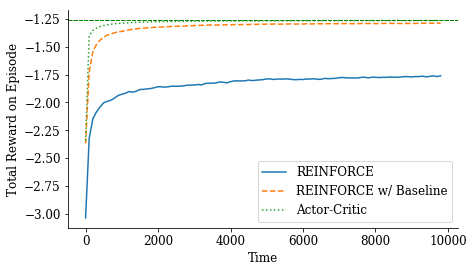

In [49]:
plot_agent(avgs1, 'REINFORCE')
plot_agent(avgs2, 'REINFORCE w/ Baseline')
plot_agent(avgs3, 'Actor-Critic')
plt.legend()
plt.savefig(f'{figs_folder}smart-vac-mem-neg-comp.pdf')
# plt.savefig(f'{figs_folder}smart-vac-mem-neg-comp.png')
plt.show()

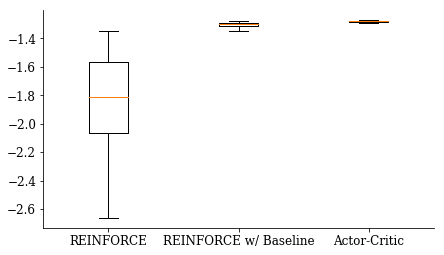

In [50]:
plt.figure(1, figsize=(7,4))
d2 = [np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]]
plt.boxplot(d2, showfliers=False)
ax = plt.gca()
ax.set_xticklabels(['REINFORCE', 'REINFORCE w/ Baseline', 'Actor-Critic'])
plt.ylabel(f'Average Return\non {episode_count} episodes')
plt.savefig(f'{figs_folder}smart-vac-mem-neg-comp-box.pdf')
# plt.savefig(f'{figs_folder}smart-vac-mem-neg-comp-box.png')
plt.show()

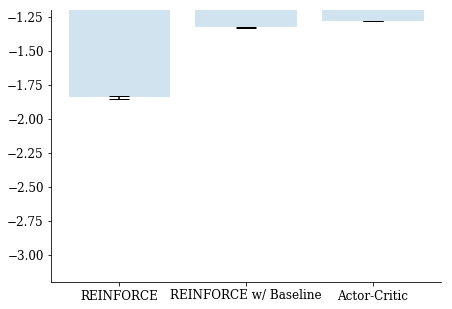

In [51]:
plt.figure(1, figsize=(7,5))
se = np.std([np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]], axis=1) / np.sqrt(num_of_tests)
agents = ['REINFORCE', 'REINFORCE w/ Baseline', 'Actor-Critic']
y = [np.mean(x) for x in [avgs1,avgs2,avgs3]]

plt.bar(range(len(agents)), [np.mean(x) for x in [avgs1,avgs2,avgs3]], alpha=0.2, ecolor='black', capsize=10, yerr=se)
plt.xticks(range(len(agents)), agents)
# plt.ylim(bottom=best_performance-0.23)
plt.ylim(bottom=-3.2, top=-1.2)
plt.ylabel(f'Average Return\non {episode_count} episodes')
plt.savefig(f'{figs_folder}smart-vac-mem-neg-comp-se.pdf')
# plt.savefig(f'{figs_folder}smart-vac-mem-neg-comp-se.png')
plt.show()

In [52]:
print(np.std([np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]], axis=1) / np.sqrt(num_of_tests))
print([np.mean(x) for x in [avgs1,avgs2,avgs3]])

[0.01120522 0.00308865 0.00028607]
[-1.8428313636363636, -1.3259684141414143, -1.2827265555555558]
